In [1]:
import cv2
import matplotlib.pyplot as plt

# 画像の読み込み

In [2]:
nature_img = cv2.imread("nature.jpg")
img = cv2.cvtColor(nature_img, cv2.COLOR_BGR2RGB)

# 画像の表示

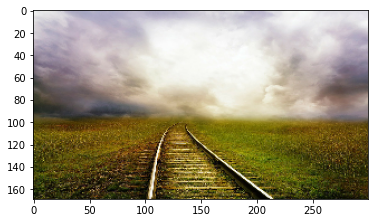

In [3]:
img = cv2.resize(img, (300, 169))
plt.imshow(img)

# グレースケール変換

```
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
```

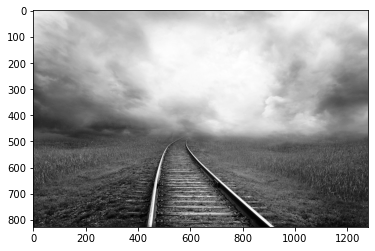

In [4]:
gray = cv2.cvtColor(nature_img, cv2.COLOR_BGR2GRAY)
plt.gray()
plt.imshow(gray)

# 平滑化（ぼかし処理）

### ガウシアンフィルタ

```
cv2.GaussianBlur(img, (ax, ay), sigma_x)
```
- ax, ay : 平滑化する画素の周囲のサイズをピクセル単位で指定。
- sigma_x : 横方向の標準偏差

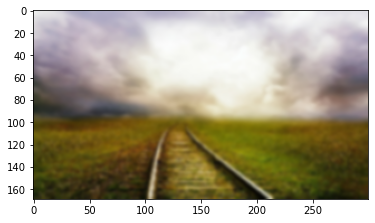

In [5]:
gausiian = cv2.GaussianBlur(img, (7, 7), 0)
plt.imshow(gausiian)

### ２値化（閾値処理）

```
cv2.threshold(img, thresh, macval, type)
```

- img : グレースケール画像
- thresh : 閾値
- macval : 閾値以上の値を持つ値に対して割り当てる値
- type : どのような２値化を行うか
  - THRESH_BINARY_INV : 閾値よりも大きな値であれば０、それ以外はmaxvalの値に変換。

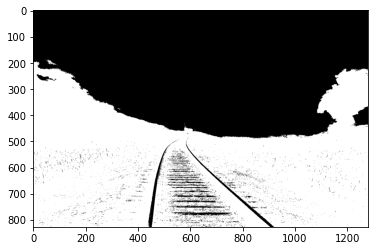

In [6]:
threshold = cv2.threshold(gray, 140, 240, cv2.THRESH_BINARY_INV)[1]
plt.gray()
plt.imshow(threshold)

# 輪郭の抽出

```
cv2.findContours(img, mode, method)
```

- mode : 抽出モード
    - cv2.RETR_LIST : 単純に輪郭を検出
    - cv2.RETR_EXTERNAL : 最も外側の輪郭のみ検出
    - cv2.RETR_CCOMP : 階層を考慮して２レベルの輪郭を検出
    - cv2.RETR_TREE : 全ての輪郭を検出し階層構造を保持
- method : 近似手法

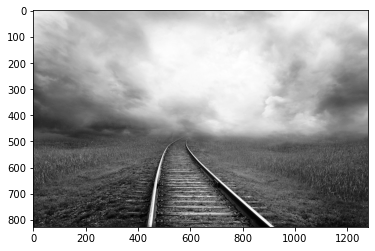

In [7]:
cons = cv2.findContours(gray, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0]
plt.imshow(cons)